<a href="https://colab.research.google.com/github/hublun/TWSApi/blob/master/IBApi_Historical_T_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_pickle('/content/Testbed\Data\MYM20201206_to_20201211170000.pkl')

In [83]:
df["Time"] = pd.to_datetime(df["time"], format='%Y%m%d  %H:%M:%S', yearfirst=True)

In [84]:
df.drop('time', axis=1, inplace=True)

In [ ]:
df["Hour"] = pd.DatetimeIndex(df["Time"]).hour
df["Minute"] = pd.DatetimeIndex(df["Time"]).minute
df["Second"] = pd.DatetimeIndex(df["Time"]).second
df["Day"] = pd.DatetimeIndex(df["Time"]).day

In [85]:
initialDateTime = df.Time[0]
initialDateTime

Timestamp('2020-12-06 18:00:05')

In [86]:
df["TradeDay"] = pd.TimedeltaIndex(df.Time - initialDateTime).days

In [88]:
 


df["dev"] = df.close - df.open
df["jump"] = df.high - df.low


 

In [89]:
df["stdv"] = df.dev.rolling(window=60, min_periods=1).std()
df["mu"] = df.dev.rolling(window=60, min_periods=1).mean()
df["t"] = (df.dev - df.mu) / df.stdv

In [110]:
df[(df.jump>2)].shape[0]

2779

In [112]:
df[(df.dev>2) | (df.dev<-2)].shape[0]

1833

In [113]:
df.head(n=100)

,open,high,low,close,avg,vol,Time,TradeDay,dev,jump,stdv,mu,t
0,30100.0,30130.0,30100.0,30130.0,30116.4,5,2020-12-06 18:00:05,0,30.0,30.0,NaN,30.0,NaN
1,30118.0,30118.0,30118.0,30118.0,30118.0,1,2020-12-06 18:00:10,0,0.0,0.0,21.213203,15.0,-0.707107
2,30118.0,30118.0,30118.0,30118.0,30118.0,0,2020-12-06 18:00:15,0,0.0,0.0,17.320508,10.0,-0.577350
3,30118.0,30118.0,30118.0,30118.0,30118.0,0,2020-12-06 18:00:20,0,0.0,0.0,15.000000,7.5,-0.500000
4,30118.0,30118.0,30118.0,30118.0,30118.0,0,2020-12-06 18:00:25,0,0.0,0.0,13.416408,6.0,-0.447214
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,30148.0,30148.0,30148.0,30148.0,30148.0,0,2020-12-06 18:08:00,0,0.0,0.0,0.000000,0.0,NaN
96,30148.0,30148.0,30148.0,30148.0,30148.0,0,2020-12-06 18:08:05,0,0.0,0.0,0.000000,0.0,NaN
97,30148.0,30148.0,30148.0,30148.0,30148.0,0,2020-12-06 18:08:10,0,0.0,0.0,0.000000,0.0,NaN
98,30148.0,30148.0,30148.0,30148.0,30148.0,0,2020-12-06 18:08:15,0,0.0,0.0,0.000000,0.0,NaN


In [114]:
df["pf10sec"] = (df.avg.shift(-2)-df.avg).fillna(0.0)
df["pf30sec"] = (df.avg.shift(-6)-df.avg).fillna(0.0)
df["pfmin"] = (df.avg.shift(-12)-df.avg).fillna(0.0)
df.tail()

,open,high,low,close,avg,vol,Time,TradeDay,dev,jump,stdv,mu,t,pf10sec,pf30sec,pfmin
81894,29950.0,29950.0,29950.0,29950.0,29950.0,0,2020-12-11 16:59:35,4,0.0,0.0,0.536519,-0.016667,0.031064,2.0,0.0,0.0
81895,29952.0,29952.0,29950.0,29951.0,29951.6,9,2020-12-11 16:59:40,4,-1.0,2.0,0.551321,-0.033333,-1.753365,0.4,0.0,0.0
81896,29952.0,29952.0,29952.0,29952.0,29952.0,6,2020-12-11 16:59:45,4,0.0,0.0,0.551321,-0.033333,0.060461,0.0,0.0,0.0
81897,29952.0,29952.0,29952.0,29952.0,29952.0,6,2020-12-11 16:59:50,4,0.0,0.0,0.551321,-0.033333,0.060461,0.0,0.0,0.0
81898,29952.0,29952.0,29952.0,29952.0,29952.0,0,2020-12-11 16:59:55,4,0.0,0.0,0.551321,-0.033333,0.060461,0.0,0.0,0.0


In [121]:
df[(df.pf10sec>10)|(df.pf10sec<-10)].shape[0]*(10*0.5-2*0.47)/2

2572.01

In [ ]:
df.drop(df.head(10*12).index, inplace=True)
df.drop(df.tail(5*12).index, inplace=True)

In [ ]:
df.shape

(81719, 19)

In [ ]:
df.columns[16:30]

Index(['pf10sec', 'pf30sec', 'pfmin'], dtype='object')

In [ ]:
pt = df[df.t<-4].shape[0] / df.shape[0] + df[df.t>4].shape[0] / df.shape[0]
pt*df.shape[0]

514.0

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


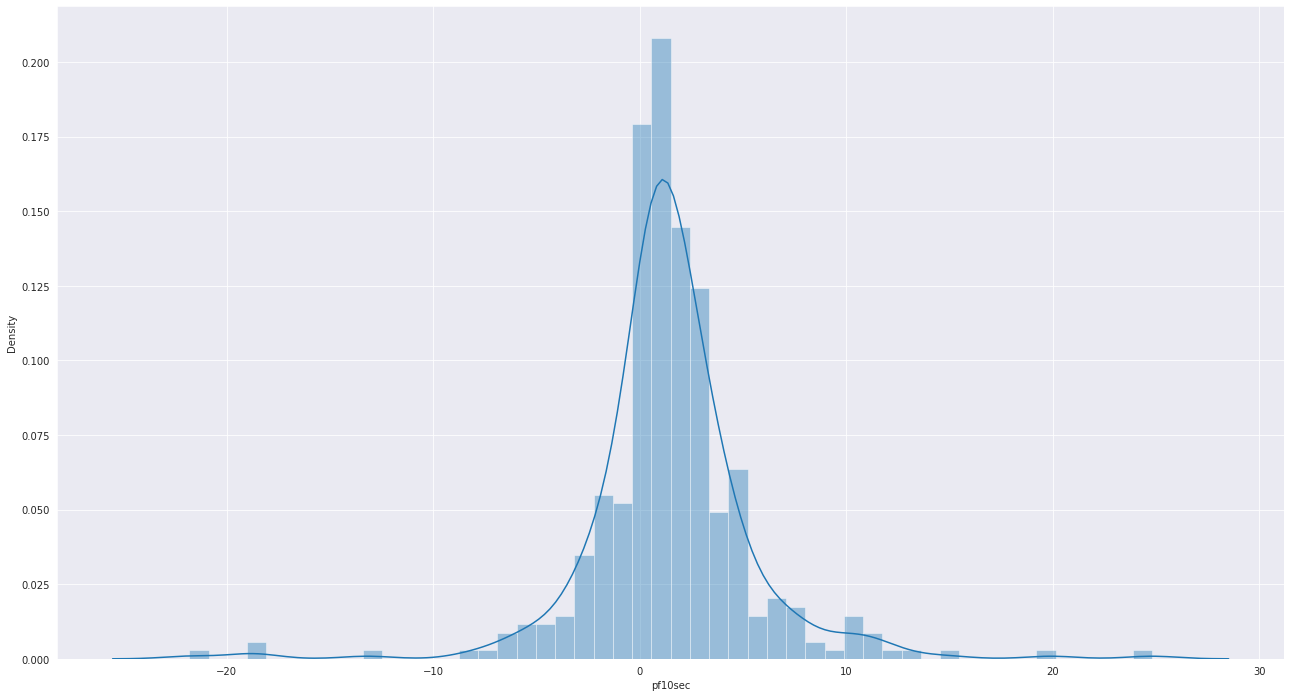

In [ ]:
data=df[df.t>3]
a4_dims = (22,12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(data.pf10sec)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


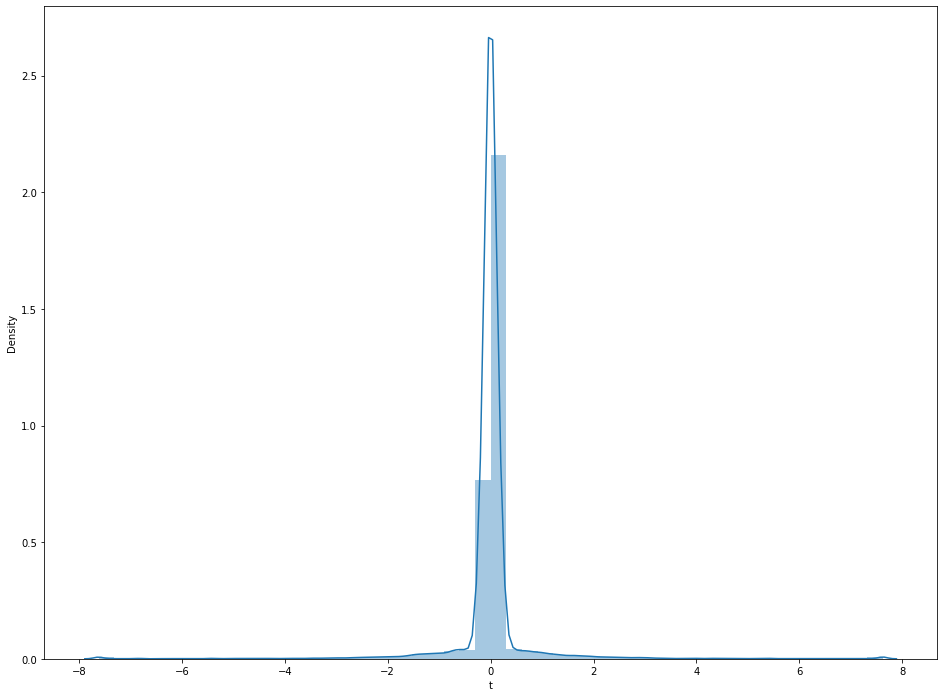

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(df.t)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


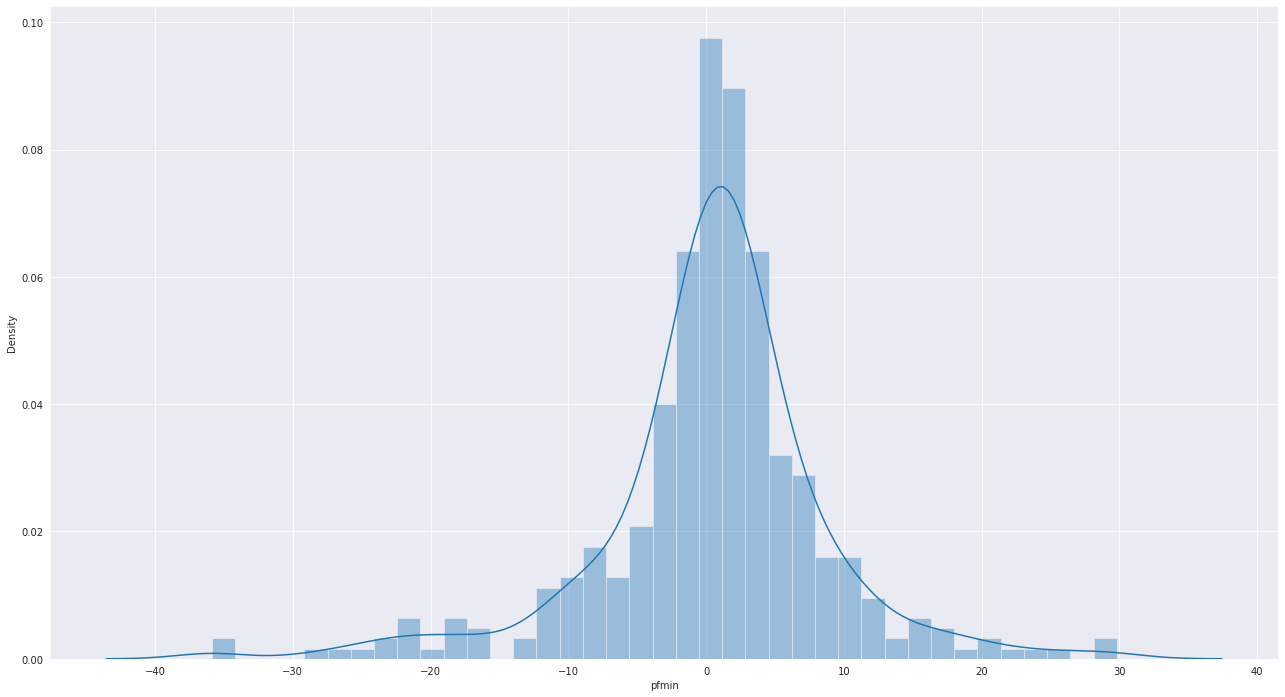

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(data.pfmin)

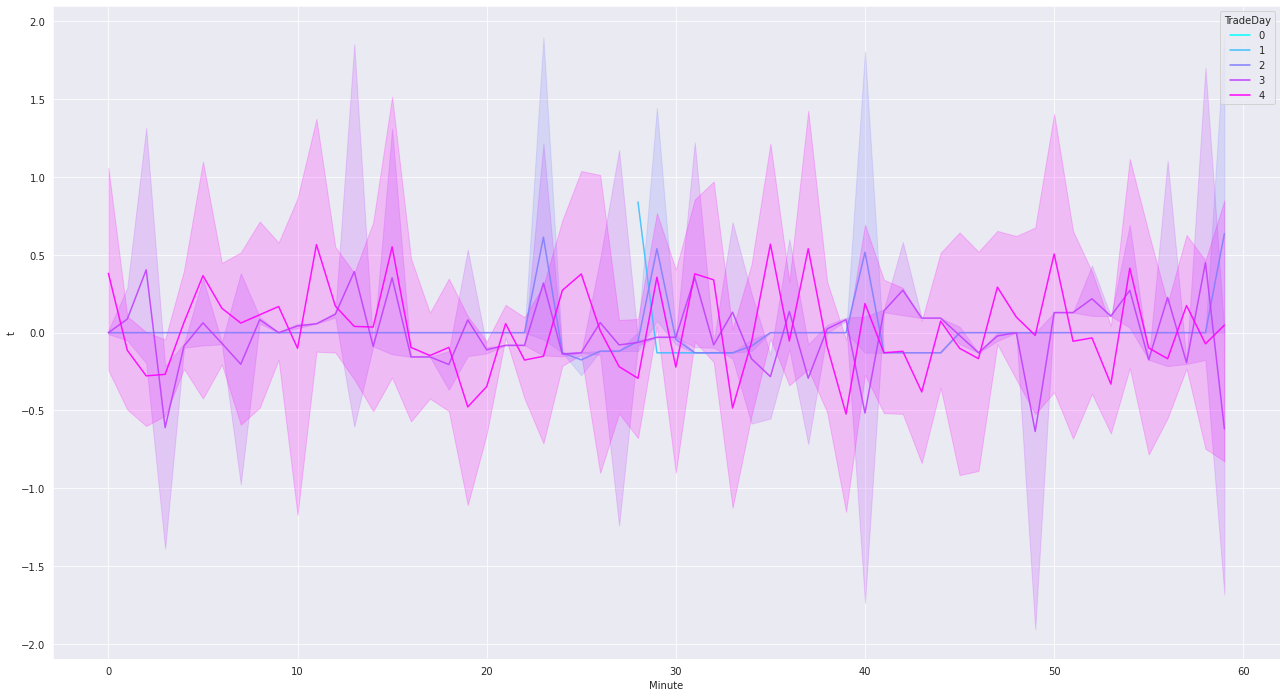

In [ ]:
data=df[df.Hour==15]
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x=data.Minute, y=data.t, hue=data.TradeDay, palette="cool", dashes=False, alpha=0.9)

In [ ]:
df[abs(df.stdv)==0.0]
#.groupby(df.Hour)["stdv"].count()


,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay,dev,stdv,mu,t,pf10sec,pf30sec,pfmin
120,30148.0,30148.0,30148.0,30148.0,30148.0,0,2020-12-06 18:10:05,18,10,5,6,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
121,30148.0,30148.0,30148.0,30148.0,30148.0,0,2020-12-06 18:10:10,18,10,10,6,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
122,30148.0,30148.0,30148.0,30148.0,30148.0,0,2020-12-06 18:10:15,18,10,15,6,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
123,30148.0,30148.0,30148.0,30148.0,30148.0,0,2020-12-06 18:10:20,18,10,20,6,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
124,30148.0,30148.0,30148.0,30148.0,30148.0,0,2020-12-06 18:10:25,18,10,25,6,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34277,30121.0,30121.0,30121.0,30121.0,30121.0,0,2020-12-08 20:06:30,20,6,30,8,2,0.0,0.0,0.0,NaN,0.0,10.0,10.0
34278,30121.0,30121.0,30121.0,30121.0,30121.0,0,2020-12-08 20:06:35,20,6,35,8,2,0.0,0.0,0.0,NaN,14.5,10.0,10.0
34279,30121.0,30121.0,30121.0,30121.0,30121.0,0,2020-12-08 20:06:40,20,6,40,8,2,0.0,0.0,0.0,NaN,10.0,10.0,10.0
60297,29850.0,29850.0,29850.0,29850.0,29850.0,0,2020-12-10 09:29:50,9,29,50,10,3,0.0,0.0,0.0,NaN,-3.8,-3.0,16.0


In [ ]:
for index, row in df.iterrows():
  if row["t_val24"] > 2:
    print(row["avg"])